# ME352 Assignment 9 - SDOF Vibration Calculator

## About the Code

This code calculates the various parameters of a single degree of freedom system by taking user input and calculating and displaying the relevant parameters and graph. This has been created by **Drishika Nadella, 181ME222** as a part of the ME352 - Machine Dynamics and Vibrations course assignment set by Professor K V Gangadharan in 6th semester, 2021. The Anaconda Jupyter Notebook environment has been employed for this. The equations in this notebook have been made using LaTeX.

## Mechanical Vibrations

Mechanical vibrations are fluctuations of a mechanical or a structural system about an equilibrium position. Mechanical vibrations are initiated when an inertia element is displaced from its equilibrium position due to energy input to the system through an external source.

**Free vibration** occurs when a mechanical system is set in motion with an initial input and allowed to vibrate freely.

**Forced vibration** is a type of vibration in which a force is repeatedly applied to a mechanical system.

## Single Degree of Freedom System

When vibration develops in a single degree of freedom system, the motion of such a system can be explained by a single second-order differential equation. The position and the velocity can describe the entire trajectory of a system.

An SDOF system typically consists of some mass, a spring element and (sometimes) a damping element.

## Parameters 

### Natural Frequency

The frequency at which a system vibrates when set in free vibration. 

### Damped Natural Frequency

In the presence of damping, the frequency at which the system vibrates when disturbed. Damped natural frequency is less than undamped natural frequency. 

### Critical Damping

The minimum amount of viscous damping that results in a displaced system returning to its original position without oscillation. 

### Damping Ratio

The ratio of actual damping to critical damping. It is a dimensionless measure describing how oscillations in a system decay after a disturbance. 

### Quality Factor

Transmissibility at resonance, which is the system’s highest possible response ratio.

### Transmissibility Ratio 

The ratio of output amplitude to input amplitude at same frequency.

In [9]:
# Importing the relevant libraries

import numpy as np 
import matplotlib.pyplot as plt

In [10]:
# Getting the various input values

m = float(input("Enter the mass of the system in kg: "))             # mass
k = float(input("Enter the spring stiffness in N/m: "))              # spring stiffness
z = float(input("Enter the damping factor zeta between 0.1-1: "))                # damping factor

# f = 1 if vibration is free, and f = 2 if vibration is forced
f = float(input("Choose whether the vibration is free (type '1') or forced (type '2'): ")) 

if f==2:
	w = float(input("Enter the harmonic frequency for the forced vibration in rad/s: "))  # forcing frequency

Enter the mass of the system in kg: 1
Enter the spring stiffness in N/m: 100
Enter the damping factor zeta between 0.1-1: 0.3
Choose whether the vibration is free (type '1') or forced (type '2'): 2
Enter the harmonic frequency for the forced vibration in rad/s: 1


Given below are all the formulae used in the calculations:

$$  \omega_n = \sqrt{\frac{k}{m}} $$

$$ f_n = \frac{\omega_n}{ 2\pi} $$

$$ T = \frac{1}{f_n} $$

$$ c_c = 2m\omega_n $$

$$ c = \zeta c_c $$

$$ \omega_d = \omega_n \sqrt{1 - \zeta^2} $$

$$ TR = \sqrt{\frac{1 + (2\zeta r)^2}{(1-r^2)^2 + (2\zeta r)^2}} $$

where $ r = \frac{\omega}{\omega_n}$.

$$ tan \phi = \frac{2\zeta r}{1 - r^2} $$

$$ M = \sqrt{\frac{1}{(1-r^2)^2 + (2\zeta r)^2}} $$

where M is the maginification factor.

In [11]:
# Calculating all the free vibration parameters (and also the forced vibration parameters that are common to both)

def free(m, k, z):
    """
    This function calculates (based on the above given formulae) and returns the 
    various parameters for a system in free vibration.
    Here, wn = natural circular frequency in rad/s
    fn = natural frequency in Hz
    T = time period of oscillation in s
    cc = critical damping factor in Ns/m
    c = damping coefficient in Ns/m
    wd = Damped natural frequency in rad/s
    q = quality factor 
    """
    wn = np.sqrt(k/m)
    fn = wn/(2*np.pi)
    T = 1/fn
    cc = 2*m*wn
    c = z*cc
    wd = wn*np.sqrt(1-z**2)
    q = 1/(2*z)

    return wn, fn, T, cc, c, wd, q

In [12]:
# Calculating the vibration parameters specifically required for forced vibration

def forced(m, k, z, w):
    """
    This function calculates (based on the above given formulae) and returns parameters that
    are specifically calculated for forced vibrations only.
    Here, tr = transmissibility ratio
    phi = phase angle in rad
    """
    wn, fn, T, cc, c, wd, q = free(m, k, z)
    tr = np.sqrt((1 + (2*z*w/wn)**2)/((1 - (w/wn)**2)**2 + (2*z*w/wn)**2))
    phi = np.arctan((2*z*w/wn)/(1-(w/wn)**2))

    return tr, phi

In [13]:
# Outputting all the common parameters 

wn, fn, T, cc, c, wd, q = free(m, k, z)
print("Angular natural frequency: %.3f rad/s" % (wn))
print("Natural frequency: %.3f Hz" % (fn))
print("Time period: %.3f s" % (T))
print("Critical damping factor: %.3f Ns/m" % (cc))
print("Damping factor: %2.3f Ns/m" % (c))
print("Damped natural frequency: %2.3f rad/s" % (wd))
print("Quality factor: %2.3f" % (q))

Angular natural frequency: 10.000 rad/s
Natural frequency: 1.592 Hz
Time period: 0.628 s
Critical damping factor: 20.000 Ns/m
Damping factor: 6.000 Ns/m
Damped natural frequency: 9.539 rad/s
Quality factor: 1.667


Transimissibility ratio: 1.010
Phase angle: 0.061 rad


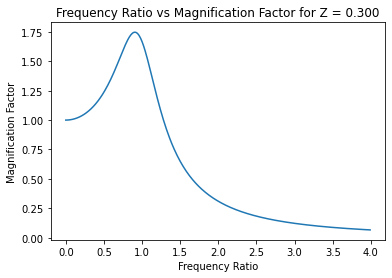

In [16]:
# Outputting forced vibration parameters and the magnification factor graph if f = 2

if int(f) == 2:
    tr, phi = forced(m, k, z, w)
    print("Transimissibility ratio: %.3f"% (tr))
    print("Phase angle: %.3f rad" % (phi))
    
    # Defining an array of frequency ratio points for the graph
    xarr = np.arange(0,4,0.01)
    
    # Defining the magnification factor values for each of the frequency ratios for the graph
    marr = np.sqrt(1/((1 - xarr**2)**2 + (2*z*xarr)**2))
    
    # Plotting the graph
    plt.plot(xarr, marr)
    plt.title("Frequency Ratio vs Magnification Factor for Z = %.3f"% z)
    plt.xlabel("Frequency Ratio")
    plt.ylabel("Magnification Factor")
    plt.show()

## Frequency Ratio vs Magnification Factor Graph

FInally, let's plot a graph between the frequency ratio and the magnification factor for multiple values of zeta. This exercise helped me better visualize the plot and understand the concepts.

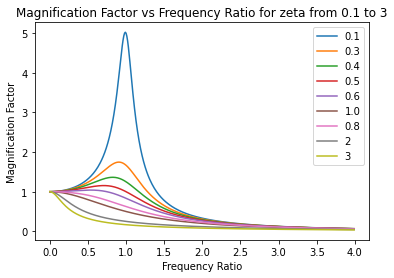

In [18]:
# Choosing a range of zeta values for plotting

z = [0.1, 0.3, 0.4, 0.5, 0.6, 1.0, 0.8, 2, 3]

for zeta in z:
    
    # Defining the magnification factor for each zeta value
    yarr = np.sqrt(1/((1 - xarr**2)**2 + (2*zeta*xarr)**2))
    
    # Plotting the graph
    plt.plot(xarr, yarr, label=zeta)
    
plt.title("Magnification Factor vs Frequency Ratio for zeta from 0.1 to 3")
plt.xlabel("Frequency Ratio")
plt.ylabel("Magnification Factor")
plt.legend()
plt.show()